In [216]:
%matplotlib inline

In [217]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

import statsmodels.api as sm


In [218]:
# Import our data into pandas from CSV
#BCH data make new df with only close and date columns and rename close column to BCH
bch_raw = 'Cryptos - YF/BCH-USD.csv'
bch_df = pd.read_csv(bch_raw, low_memory=False)
bch = bch_df[["Date", "Close"]]
clean_bch= bch.rename(columns={"Close": "BCH_Close"})
clean_bch["BCH_PC"] = clean_bch["BCH_Close"].pct_change()

#BNB follow same process as above
bnb_raw = 'Cryptos - YF/BNB-USD.csv'
bnb_df = pd.read_csv(bnb_raw, low_memory=False)
bnb = bnb_df[["Date", "Close"]]
clean_bnb= bnb.rename(columns={"Close": "BNB_Close"})
clean_bnb["BNB_PC"] = clean_bnb["BNB_Close"].pct_change()

#BTC follow same process as above
btc_raw = 'Cryptos - YF/BTC-USD.csv'
btc_df = pd.read_csv(btc_raw, low_memory=False)
btc = btc_df[["Date", "Close"]]
clean_btc= btc.rename(columns={"Close": "BTC_Close"})
clean_btc["BTC_PC"] = clean_btc["BTC_Close"].pct_change()

#EOS follow same process as above
eos_raw = 'Cryptos - YF/EOS-USD.csv'
eos_df = pd.read_csv(eos_raw, low_memory=False)
eos = eos_df[["Date", "Close"]]
clean_eos= eos.rename(columns={"Close": "EOS_Close"})
clean_eos["EOS_PC"] = clean_eos["EOS_Close"].pct_change()

#ETH follow same process as above
eth_raw = 'Cryptos - YF/ETH-USD.csv'
eth_df = pd.read_csv(eth_raw, low_memory=False)
eth = eth_df[["Date", "Close"]]
clean_eth= eth.rename(columns={"Close": "ETH_Close"})
clean_eth["ETH_PC"] = clean_eth["ETH_Close"].pct_change()

#LINK follow same process as above
link_raw = 'Cryptos - YF/LINK-USD.csv'
link_df = pd.read_csv(link_raw, low_memory=False)
link = link_df[["Date", "Close"]]
clean_link= link.rename(columns={"Close": "LINK_Close"})
clean_link["LINK_PC"] = clean_link["LINK_Close"].pct_change()

#LTC follow same process as above
ltc_raw = 'Cryptos - YF/LTC-USD.csv'
ltc_df = pd.read_csv(ltc_raw, low_memory=False)
ltc = ltc_df[["Date", "Close"]]
clean_ltc= ltc.rename(columns={"Close": "LTC_Close"})
clean_ltc["LTC_PC"] = clean_ltc["LTC_Close"].pct_change()

#TRX follow same process as above
trx_raw = 'Cryptos - YF/TRX-USD.csv'
trx_df = pd.read_csv(trx_raw, low_memory=False)
trx = trx_df[["Date", "Close"]]
clean_trx= trx.rename(columns={"Close": "TRX_Close"})
clean_trx["TRX_PC"] = clean_trx["TRX_Close"].pct_change()

#XLM follow same process as above
xlm_raw = 'Cryptos - YF/XLM-USD.csv'
xlm_df = pd.read_csv(xlm_raw, low_memory=False)
xlm = xlm_df[["Date", "Close"]]
clean_xlm= xlm.rename(columns={"Close": "XLM_Close"})
clean_xlm["XLM_PC"] = clean_xlm["XLM_Close"].pct_change()

#XRP follow same process as above
xrp_raw = 'Cryptos - YF/XRP-USD.csv'
xrp_df = pd.read_csv(xrp_raw, low_memory=False)
xrp = xrp_df[["Date", "Close"]]
clean_xrp= xrp.rename(columns={"Close": "XRP_Close"})
clean_xrp["XRP_PC"] = clean_xrp["XRP_Close"].pct_change()

#merge all clean df's into one big df
BCH_BNB= pd.merge(clean_bch, clean_bnb, how ="inner", on= "Date")
BTC_EOS= pd.merge(clean_btc, clean_eos, how ="inner", on= "Date")
ETH_LINK= pd.merge(clean_eth, clean_link, how ="inner", on= "Date")
LTC_TRX= pd.merge(clean_ltc, clean_trx, how ="inner", on= "Date")
XLM_XRP= pd.merge(clean_xlm, clean_xrp, how ="inner", on= "Date")

BCH_EOS= pd.merge(BCH_BNB, BTC_EOS, how ="inner", on= "Date")
ETH_TRX=pd.merge(ETH_LINK, LTC_TRX, how ="inner", on= "Date")
BCH_TRX=pd.merge(BCH_EOS, ETH_TRX, how="inner", on= "Date")

Yahoo_Combined= pd.merge(BCH_TRX, XLM_XRP, how="inner", on="Date")

Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
0,2017-09-21,416.130005,-0.128067,0.7018,-0.096084,3617.270020,-0.068233,0.5671,-0.080279,257.769989,...,0.1727,NaN,46.459999,-0.098914,0.002075,-0.237693,0.01057,-0.140650,0.1710,-0.058888
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655


In [219]:
Yahoo_Combined = Yahoo_Combined.drop([0], axis=0)
Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655
5,2017-09-26,449.559998,-0.002861,0.8642,-0.066940,3892.699951,-0.010204,0.5614,-0.013010,288.640015,...,0.1951,0.093610,52.270000,0.000000,0.001876,0.078161,0.01236,0.026578,0.1892,0.024919


In [220]:
Yahoo_Combined.replace([np.inf,-np.inf], np.nan,inplace=True)
Yahoo_Combined=Yahoo_Combined.fillna(0)

Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655
5,2017-09-26,449.559998,-0.002861,0.8642,-0.066940,3892.699951,-0.010204,0.5614,-0.013010,288.640015,...,0.1951,0.093610,52.270000,0.000000,0.001876,0.078161,0.01236,0.026578,0.1892,0.024919


In [221]:
group1 = Yahoo_Combined["BTC_PC"]
group2 = Yahoo_Combined["BNB_PC"]
group3 = Yahoo_Combined["BCH_PC"]
group4 = Yahoo_Combined["EOS_PC"]
group5 = Yahoo_Combined["ETH_PC"]
group6 = Yahoo_Combined["LINK_PC"]
group7 = Yahoo_Combined["LTC_PC"]
group8 = Yahoo_Combined["TRX_PC"]
group9 = Yahoo_Combined["XLM_PC"]
group10 = Yahoo_Combined["XRP_PC"]

gp_ls = [group2, group3, group4, group5, group6, group7, group8, group9, group10]
ls = ["BTC","BNB", "BCH", "EOS", "ETH", "LINK", "LTC", "TRX", "XLM", "XRP"]

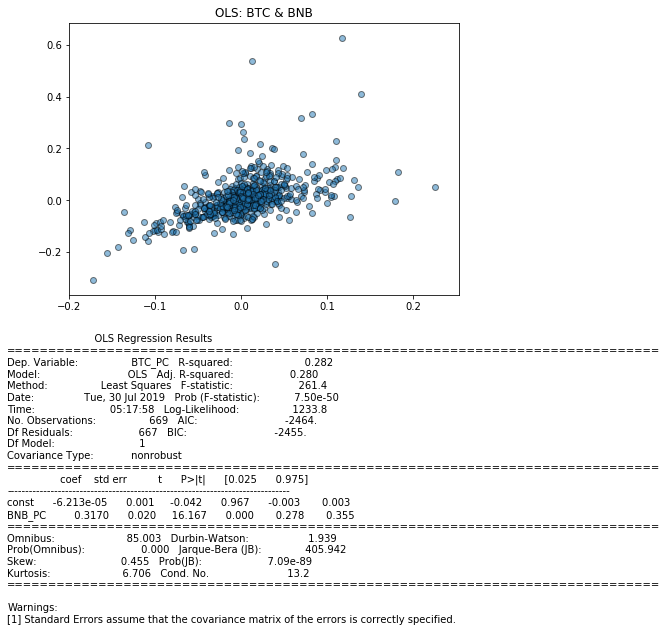

In [222]:
i = 0

x_axis = group1
y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])
BTC = group1

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 1.75, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()



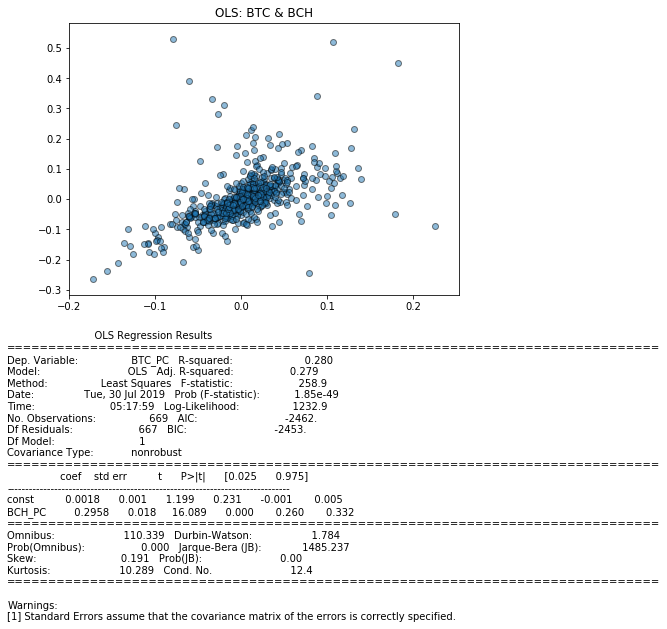

In [223]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 1.75, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()


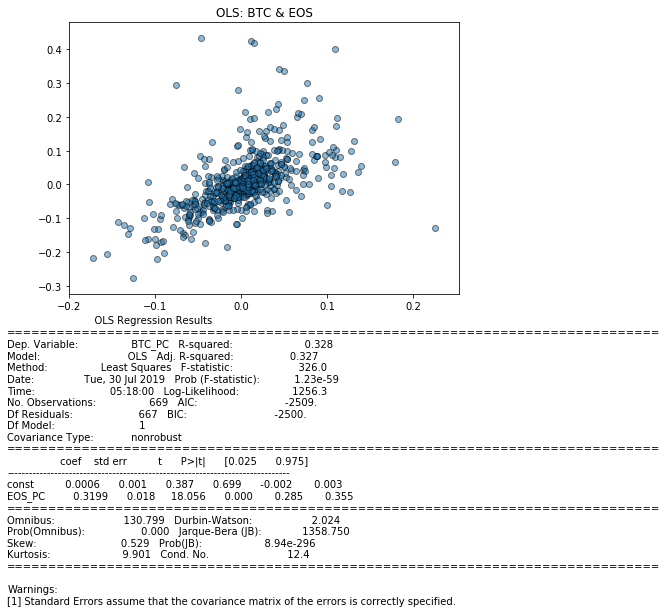

In [224]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 1.75, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()

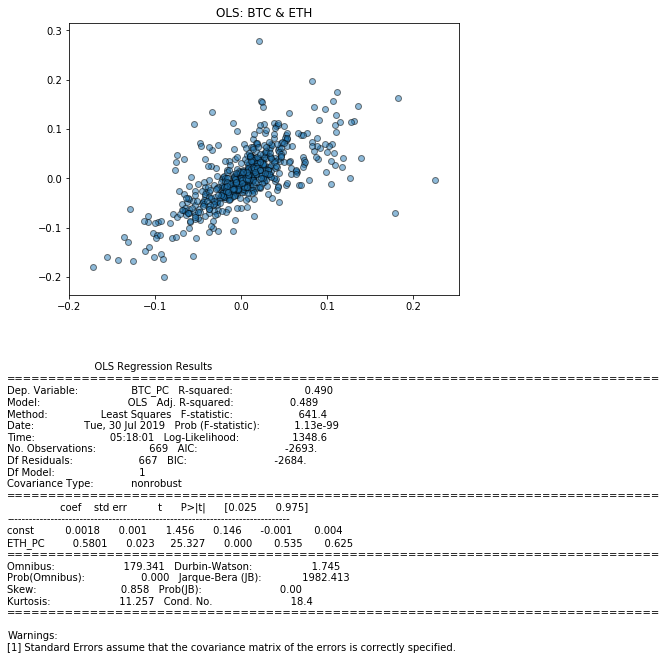

In [225]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 2, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()

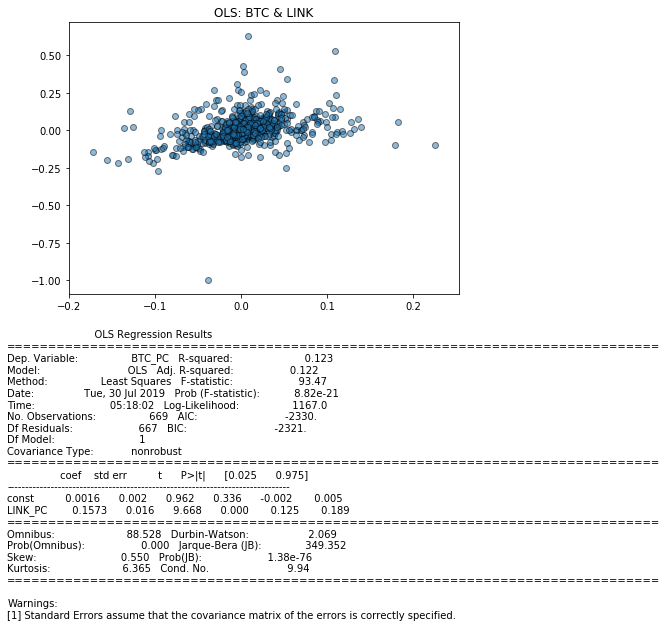

In [226]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 2, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()

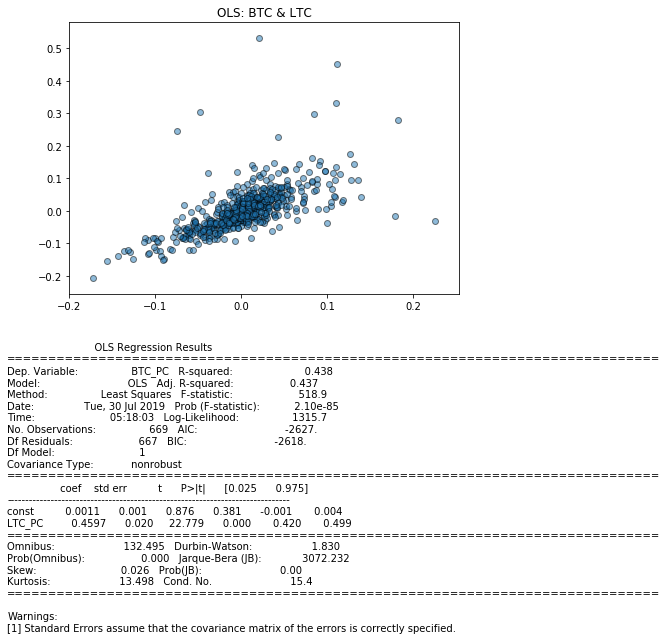

In [227]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 1.75, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()

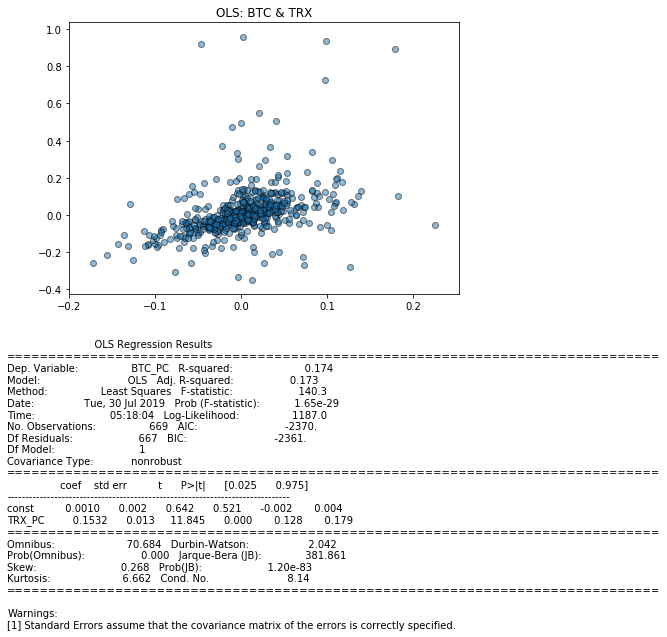

In [228]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 1.7, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()

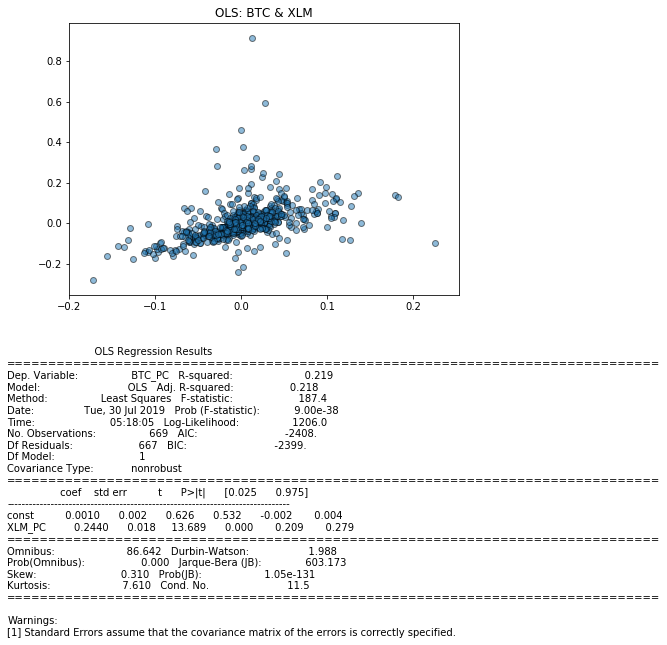

In [229]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 1.7, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()

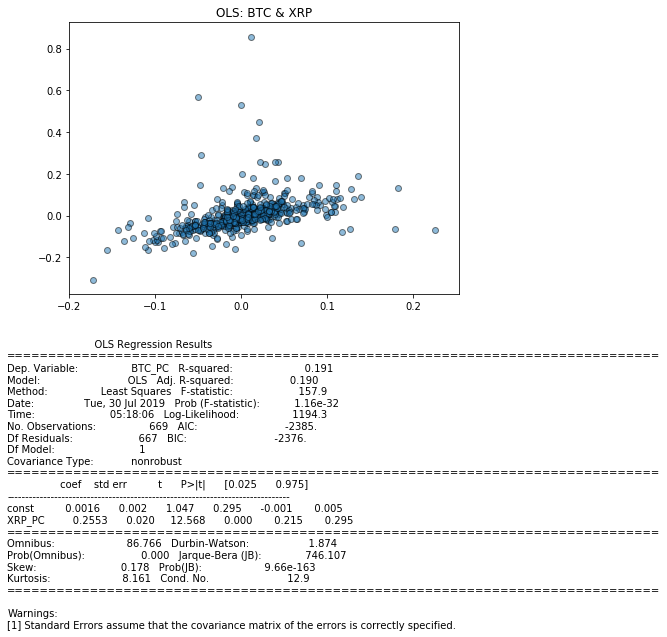

In [230]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = sm.add_constant(gp_ls[i])

model = sm.OLS(BTC, x)
OLS_result= model.fit()
output = OLS_result.summary()
mini_x = min(x_axis)
y_rng = abs(max(y_axis)) + abs(min(y_axis))

plt.text(mini_x - .1, -y_rng * 1.7, output, fontsize = 10)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")

plt.show()